In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.optimize as op
import scipy.stats as st
import numpy as np
import numpy.random as rnd
rnd.seed()

sns.set_context("talk")

/usr/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def gauss(x, mean, std):
    A = 1/(std * np.sqrt(2 * np.pi))
    return A * np.exp(-0.5 * ((x - mean)/std)**2)

In [3]:
# Data From James Wang
cap_data = np.array([97.3, 95.3, 93.0, 92.1, 92.6, 93.8, 95.0, 95.0, 96.2,
                     94.1, 94.3, 93.9, 94.1, 94.7, 96.0, 97.1, 92.6, 93.0,
                     93.8, 94.5, 93.3, 95.8, 93.5, 96.2, 94.4, 93.5, 94.4,
                     95.6, 92.7, 95.3, 95.3, 94.9, 93.8, 96.3, 93.4, 94.5,
                     94.1, 92.0, 94.7, 94.1, 95.2, 93.7, 94.8, 94.2, 96.5,
                     94.2, 94.6, 93.0, 93.5, 88.7, 94.4, 92.3, 95.0, 92.9,
                     94.0, 93.3, 96.2, 94.2, 93.0, 94.8, 92.8, 93.2, 94.3,
                     93.4, 93.0, 94.1, 95.6, 93.8, 94.1, 95.2, 94.0, 94.7,
                     95.5, 96.4, 94.9, 94.9, 94.9, 94.6, 95.2, 94.0, 95.7,
                     93.3, 92.5, 96.2, 94.0, 94.8, 93.7, 95.3, 93.6, 93.2,
                     94.0, 93.7, 92.8, 92.6, 93.0, 94.9, 94.1, 93.5, 94.3,
                     96.1])

cap_data.sort()

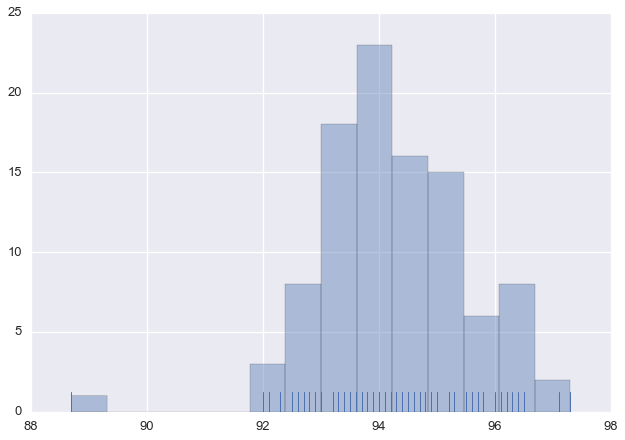

In [4]:
# One line to get eyes on the data.
# Then you can fiddle with the bin width and other decisions.
axis = sns.distplot(cap_data, kde=False, rug=True)

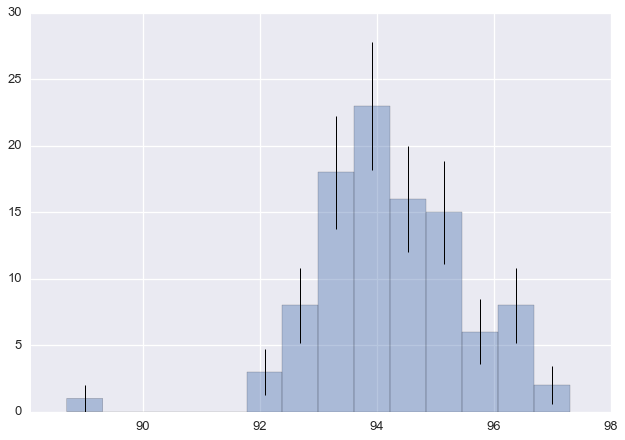

In [5]:
# Replot

cap_fig, cap_axis = plt.subplots()
cap_axis = sns.distplot(cap_data, kde=False, rug=False)

bar_width = cap_axis.patches[0].get_width()
bar_centers = np.array([bar.get_x() + bar_width/2 
                        for bar in cap_axis.patches if bar.get_height() != 0])

# Error bars
bar_heights = np.array([bar.get_height() 
                        for bar in cap_axis.patches if bar.get_height() != 0])
errors = np.sqrt(bar_heights)

for error_x, error_y, error in zip(bar_centers, bar_heights, errors):
    cap_axis.errorbar(error_x, error_y, error, color='black', elinewidth=1)

# Formatting
cap_axis.set_xlim(left=cap_data[0] - bar_width);

N:			 100
mean:			 94.25
standard deviation:	 1.41
error of the mean:	 0.13
min:			 88.7, -4.38 sigma
max:			 97.3,  2.41 sigma


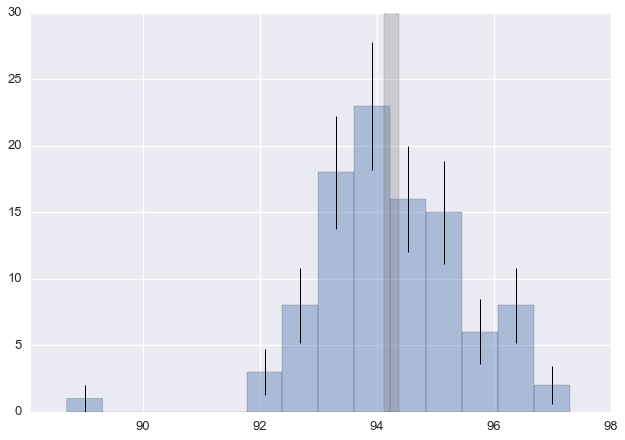

In [6]:
N = len(cap_data)
mean = cap_data.mean()
std = cap_data.std()
mean_error = std / np.sqrt(N)

cap_min = min(cap_data)
cap_min_std = (cap_min - mean) / std
cap_max = max(cap_data)
cap_max_std = (cap_max - mean) / std

xmin = cap_min - bar_width
xmax = cap_max + bar_width

x = np.linspace(cap_min - bar_width, cap_max + bar_width)

print 'N:\t\t\t {0}'.format(N)

print 'mean:\t\t\t {0:.2f}'.format(mean)

print 'standard deviation:\t {0:.2f}'.format(error)
# What does this mean again?

print 'error of the mean:\t {0:.2f}'.format(mean_error)

print 'min:\t\t\t {0:.1f}, {1:.2f} sigma'.format(cap_min, cap_min_std)

print 'max:\t\t\t {0:.1f},  {1:.2f} sigma'.format(cap_max, cap_max_std)

# Plot it
cap_axis.set_ylim(cap_axis.get_ylim())
cap_axis.set_xlim(cap_axis.get_xlim())
# shade the mean
shade = plt.Rectangle(xy=(mean - mean_error, 0),
                      width=(2 * mean_error),
                      height=40,
                      facecolor='grey',
                      alpha=0.3)

cap_axis.add_patch(shade)

cap_fig

Should I include the smallest point in the analysis?

What is it going to contribute to a chi squared analysis?

In fact, what are bins from 88-92 going to contribute to the analysis?

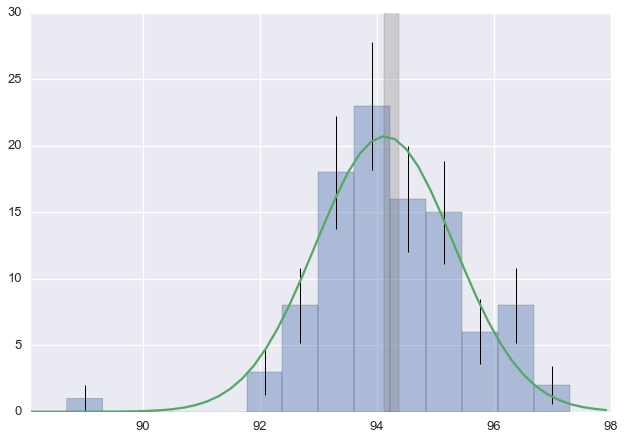

In [7]:
normed_heights = bar_heights / (N * bar_width)
(fit_mean, fit_err), covariance = op.curve_fit(gauss,
                                               bar_centers, normed_heights,
                                               p0=[mean, std])

cap_axis.plot(x, N * bar_width * gauss(x, mean=fit_mean, std=fit_err))
cap_fig

chi squared:	7.24089441883
reduced chi:	1.0344134884


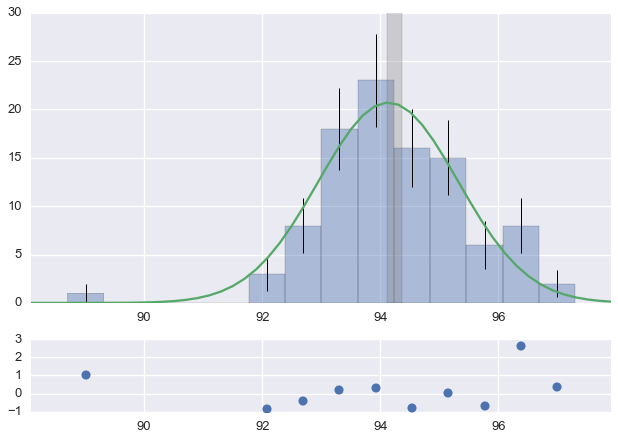

In [8]:
# How do we determine the degrees of freedom?
fitted_parameters = 2

fit_points = N * bar_width * gauss(bar_centers, fit_mean, fit_err)
diff = bar_heights - fit_points
std = np.sqrt(bar_heights)
chi2 = (diff / std)**2
residuals = np.sign(diff) * chi2

reduced_chi = sum(chi2)/(len(chi2)-fitted_parameters-1)
print 'chi squared:\t', sum(chi2)
print 'reduced chi:\t', reduced_chi

# add second plot to figure
grid = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[4,1])
cap_axis.set_position(grid[0].get_position(cap_fig))
residual_axis = cap_fig.add_subplot(grid[1], sharex=cap_axis)

residual_axis.plot(bar_centers, residuals, 'o');

# change number of y ticks and plot limits
yloc = plt.MaxNLocator(4)
residual_axis.yaxis.set_major_locator(yloc)
residual_axis.set_xlim(left=xmin, right=xmax)


# 

#grid.tight_layout(cap_fig)
cap_fig